# Simulation of a positron-induced Muon Source (part 1)

### Description

The production of a high brillance muon beam is one of the most important challenge for the future of Particle Physics. A particularly interesting idea consists of shooting high energy positrons on a target, aiming at the production of muons by means of the process $e^+ + e^- \rightarrow \mu^+ + \mu^-$. To mimize the divergence of the resulting "muon beam", the positrons energy is chosen so that the reaction occurs close to threshold (assuming the electrons in the target to be at rest). The main goal of this project is to produce a Monte Carlo simulation of such a process. 

### Assignments

The project is split into two parts, which are both reported here for consistency. This group has only to cover _part 1_.

#### Part 1: generate a simulated dataset of $e^+ + e^- \rightarrow \mu^+ + \mu^-$ events.

1. Compute the process leading-order cross section, $\sigma(\theta; \sqrt{s})$, as a function of the scattering angle $\theta$ and with the  center of mass energy $\sqrt{s}$ as a parameter. Start by computing it in the center of mass system. N.B.: textbooks reports such cross section in the relativistic limit, i.e. for $\sqrt{s}\gg m_\mu$, which is clearly not the case here ($\sqrt{s}\sim 2m_\mu$);
2. compute and display the angle and momentum components distributions of the emerging muon pairs;
3. boost muons four-momenta in the laboratory frame, i.e. in the frame where the electron is at rest and the positron has enough energy to give rise to the process;
4. write a Monte Carlo simulation that generates scattering events following the distributions that you found analytically; 
5. produce a synthetic dataset of about $N=10^5$ (or more) events. Events should be listed as rows in a file with columns representing the muons coordinates (keep in mind that in the lab frame muons are relativistic and thus the number of coordinates can be only 3 per muon);
6. assume a $3$ cm thick Beryllium block is used as target and a rate of positron on target of $10^6$ Hz. Compute the rescaling factor (weight) you need to apply to the $N$ simulated events such that they represent the statistics that would be gathered in a week of countinuous operations;
7. repeat what done so far simulating now the actual transverse shape and energy spread of the beam: for the former assume a flat distribution in a circle of radius $r=1$ cm and for the latter a gaussian distribution centered at the nominal beam energy and a width of $0.5$ GeV;
8. given that the electrons traversing the target lose energy as $E(z)=E_0 \exp{-z/X_0}$ (with z the longitudinal coordinate of the target, the one parallel to the beam direction and $X_0$ (35.28 cm, Dudo) is the Beryllium radiation length), compute the nominal beam energy $E_0$ such that muon pairs can be generated along the whole length of the target;
9. (optional) take the former point into account when generating the events (i.e. the proccess $\sqrt{s}$ depend on the position along the target where the $e^+ - e^-$ scattering occurrs.

In [1]:
#from jupyterthemes import jtplot
# jtplot.style(theme="onedork")

### Simulation of positron-induced Muon Source

The main goal of this project is the simulation of a muon source induced by an electron-positron pair annihilation.
The calculation of the cross section comes from the derivation of the unpolarised scattering amplitude - we are not interested in the polarisation of both incoming and outgoing particles. 
Moreover, we are not interested in considering the annihilation in the usual Ultra Relativistic limit ($m \sim 0$), but we are interested in the range of energy close to the threshold for the muon pair production: $\sqrt s \sim 2m_\mu$. 

1. The differential cross section for the considered process, in the CoM frame (\*-quantities), has the following expression: $$\left(\frac{d\sigma}{d\Omega}\right)^* \Big\rvert_{CoM} (\sqrt s, \theta^*, \phi^*)= \frac{\alpha^2}{4s}\left(1-\frac{4m_\mu^2}{s}\right)^{1/2}\left(1-\frac{4m_e^2}{s}\right)^{-1/2}\left[1+\frac{4}{s}\left(m_e^2+m_\mu^2\right)+\left(1-\frac{4m_\mu^2}{s}\right)\left(1-\frac{4m_e^2}{s}\right)\cos^2\theta^*\right]$$

where the differential cross section in the center of mass is expressed as a function of the (CoM) energy $\sqrt s$ (the first Mandelstam variable, equal for both $e$ and $\mu$ pairs in che cms frame), the masses of $e^+$ and $e^-$ $m_e$ and of the muons $m_\mu$, and the emission angle in the center of mass $\theta$. ($\alpha$ is the EM constant, $\alpha=\frac{e^2}{4\pi}$). One can also notice that the differential cross section depends only on the $\theta$ angle, and not on the other angle $\phi$.

The total cross section can be found integrating over the solid angle. 
$$ \sigma (\sqrt s) = \int_{4\pi} d \Omega^* \frac{d\sigma^*}{d\Omega^*} = \int_0^{\pi} d\theta^* sin\theta^* \int_0^{2\pi} d\phi^* \frac{d\sigma^*}{d\Omega^*} =  4\pi\frac{\alpha^2}{3s^3}\left(1-\frac{4m_\mu^2}{s}\right)^{1/2}\left(1-\frac{4m_e^2}{s}\right)^{-1/2}(2m_e^2+s)(2m_\mu^2+s) $$ 
 
2. The angular distribution can be simply computed normalizing the differential cross section with respect to the total one: 
$$ f(\theta^*, \phi^*) = \frac{1}{\sigma} \frac{d\sigma^*}{d\Omega^*}$$ 

As we are considering a case in which we have a stationary target, we need to pass from the CM coordinates to the LAB ones. Of course a Lorentz boost is going to be involved for both angles and spatial coordinates. 

In the CM frame, the 4-momentum for the incoming and outgoing particles can be written as: 
$$p_{e^\pm}^* = (E^*, \pm \vec p_e^{\,*}) \,\,\,\,\,\,\, p_{\mu ^\pm}^{\prime\,*} = (E^*, \pm \vec p_\mu^{\,\prime\,*})$$

The speed of the center of mass $\beta^*$, in the case in which we consider the electron at rest is given by: 
        $$ \beta^* = \frac{p_{e^+}}{E_{e^+}+m_{e^-}}$$
Moreover, as we consider a process in which there is the production of two muons ($m_\mu \sim 207 m_e$), we can well approximate the parameter $ \beta^* \sim \frac{p_{e^+}}{E_{e^+}} = \beta_{e^+} $

The energy of the CoM $E^*$ can be written in terms of the Mandelstam variable *s*: $\sqrt s = \sqrt{p_{e^-}^2+p_{e^+}^2} = 2E^*$ ( $\sim 2m_\mu$ in the considered case).

And so, it follows:

$$\beta^*_{e^\pm} = \frac{\lvert\vec p^{\,*}\rvert}{E^*} = \frac{ \sqrt{(E^*)^2-m_e^2}}{E^*} = \sqrt{1-\frac{4m_e^2}{s} } $$

And analogously, $$\beta^*_{\mu^\pm} = \sqrt{1-\frac{4m_\mu^2}{s}}$$
(The factors we have in the cross section formula).





2. Compute and display the angle and momentum components distributions of the emerging muon pairs;

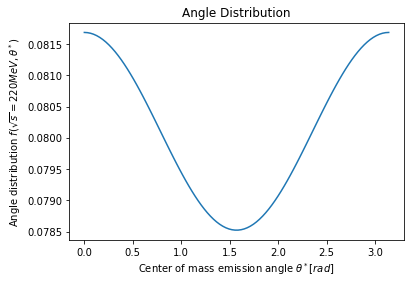

It can be also verified that this function is well reproduced at different values of s.


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
#import spingi as sp
#import amonoi as ano

alpha  = 1/(137.035999084) #dimensionless CODATA 2018 Fine-Structure constant
m_muon = 105.6583755       #[MeV] CODATA 2018 Muon mass
m_e    = 0.51099895        #[MeV] CODATA 2018 Electron mass
s      = 220**2            #[MeV] For the sake of simplicity we take as a reference pow(sqrt(s),2). 
                           #We have choosen a s-value close to 2 m_mu, as required by the considered process


def dsigmadtheta(s,theta, phi = 0):
    return (alpha**2/(4*s))*(1-(4*m_muon**2)/s)**0.5*((1-(4*m_e**2)/s))**-0.5*(1+(4/s)*(m_e**2+m_muon**2)+(1-(4*m_e**2)/s)*(1-(4*m_muon**2)/s)*np.cos(theta)**2)
def sigma(s):
    return 4*np.pi*(alpha**2/(3*s**3))*(1-(4*m_muon**2)/s)**0.5*((1-(4*m_e**2)/s))**-0.5*(2*m_e**2+s)*(2*m_muon**2+s)
    
def f(s, theta, phi = 0):
    return dsigmadtheta(s,theta)/sigma(s)


x = np.linspace(0,np.pi,100)
plt.title("Angle Distribution")
plt.xlabel(r'Center of mass emission angle $\theta^*[rad]$' )
plt.ylabel(r'Angle distribution $f(\sqrt{s} = 220 MeV, \theta^*)$' )
plt.plot(x, f(s,x))
plt.show()

print("It can be also verified that this function is well reproduced at different values of s.")

In order to write the actual components of the momentum of the emitted muons, we need to generate some random numbers distributed accordingly to the angle distribution just shown.

In order to achieve such a result, we need to calculate the cumulative density funcion (CDF) of the angle distribution $f(\theta^*, \phi^*) := g(\theta^*, 2\pi)$. For simplicity we will consider $\phi^* = 2\pi$ as the contribution in $\phi$ is actually neglected.

\begin{aligned}
g(\theta^*) = \int _{0}^{\theta^*}dx\sin x\frac{3}{4}\frac{2\pi}{4\pi} \dfrac{s^2}{\left( 2m_e^{2}+s\right) \left( 2m_{\mu }^{2}+s\right) }\left( 1+\dfrac{4}{s}\left( m_{e}^{2}+m_{\mu}^{2}\right) +\left( 1-\dfrac{4m_{e}^{2}}{s}\right)\left( 1-\dfrac{4m_{\mu}^{2}}{s}\right) \cos^2x \right)\\
\end{aligned}


\begin{aligned}
= \frac{3}{8} \dfrac{s^2}{\left( 2m_e^{2}+s\right) \left( 2m_{\mu }^{2}+s\right) }\left( - \left( 1+\dfrac{4}{s}\left( m_{e}^{2}+m_{\mu}^{2}\right)\right)\cos x+\left( - \frac{1}{3}\left( 1-\dfrac{4m_{e}^{2}}{s}\right)\left( 1-\dfrac{4m_{\mu}^{2}}{s}\right) \right)\cos^3 x \right) \Big\rvert_0^{\theta^*}\\
\end{aligned}

\begin{aligned}
= \frac{3}{8} \dfrac{s^2}{\left( 2m_e^{2}+s\right) \left( 2m_{\mu }^{2}+s\right) }\left( \left( 1+\dfrac{4}{s}\left( m_{e}^{2}+m_{\mu}^{2}\right)\right)(1-\cos \theta^*)+\left(\frac{1}{3}\left( 1-\dfrac{4m_{e}^{2}}{s}\right)\left( 1-\dfrac{4m_{\mu}^{2}}{s}\right) \right)(1-\cos^3 \theta^*) \right)\\
\end{aligned}


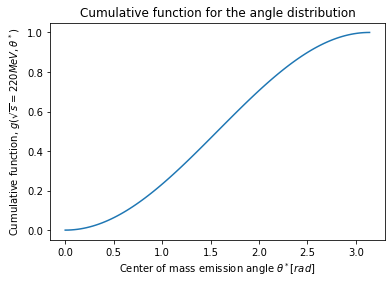

In [3]:
def g(s, x): #x is a dummy for theta star
    #return s**2*3./8.*((1+4*(m_e**2+m_muon**2)/s)*(1-np.cos(x))+(1-4*m_e**2/s)*(1-4*m_muon**2/s)*(1-np.cos(x))/3)/((2*m_e**2+s)*(2*m_muon**2+s))
    return s**2*3./8.*((1+4*(m_e**2+m_muon**2)/s)*(1-np.cos(x))+(1-4*m_e**2/s)*(1-4*m_muon**2/s)*(1-np.cos(x)**3)/3)/((2*m_e**2+s)*(2*m_muon**2+s))

plt.title("Cumulative function for the angle distribution")
plt.xlabel(r'Center of mass emission angle $\theta^*[rad]$' )
plt.ylabel(r'Cumulative function, $g(\sqrt{s} = 220 MeV, \theta^*)$' )

plt.plot(x,g(s,x))
plt.show()

We can now observe that the norm of the momentum of the outgoing muon can be written as follows:
$$ \lvert \vec p^{\,*}_\mu \rvert = \sqrt {\frac{s}{4}-m_\mu^2} $$
And the momentum components' distributions can be simply derived knowing the center of mass energy - s - and the emission angles in the CoM - $ \theta^* $ and $ \phi^* $. 

$$ p^*_\mu = \lvert \vec p^{\,*}_\mu \rvert (\sqrt(s)/\lvert \vec p^{\,*}_\mu \rvert, sin\theta^* cos\phi^*, sin\theta^* sin\phi^*, cos\theta^*) $$

3. Finally, the relation between the Lab angles and the COM ones has the usual formula: 
$$tan \theta_\mu  = \frac {sin\theta^*_\mu}{\gamma(cos\theta^*_\mu+\beta / \beta^*_\mu)}   $$


If we are consider, without loss of generalities, a boost towards the x axis, the relations between the energy and momentum components become:  
$$ E_1 = \gamma ( E^*+\beta p^*_x) \,\,\,\,\,\, p_{1,x} = \gamma(\beta E^*+p^*_x ) $$

$$ E_2 = \gamma ( E^*-\beta p^*_x) \,\,\,\,\,\, p_{2,x} = \gamma(\beta E^*-p^*_x ) $$
The relation $$\vec p^*=\vec p_1^*=-\vec p_2^*$$ turns out, setting $$\theta_1^*=\theta^*, \,\,\,\,\,\, \phi_1^*=\phi^* $$ in the following relation between the angles of the two emerging muons: $$\theta_2^*=\pi+\theta^*, \,\,\,\,\,\,  \phi_2^*=\phi^*$$

4 To find out the inverse cumulative distribution function we sample 

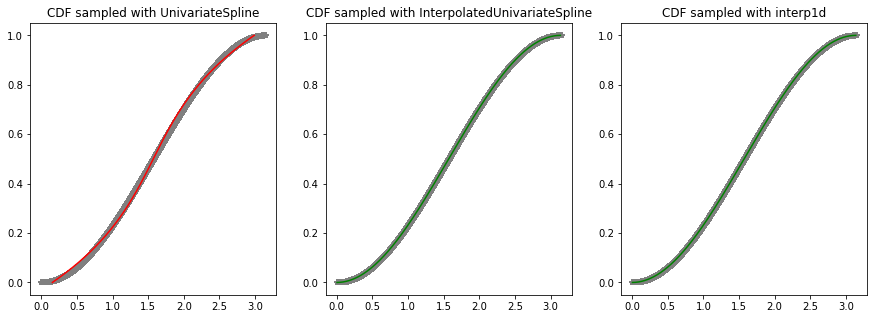

In [4]:
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt 

fig, ax = plt.subplots(1,3, figsize = (15,5))

N = 10**6

#angles on which we sample the inverse CDF
theta_star = np.linspace(0, np.pi, N)

#three version of inverse CDF sampling
inv_cdf1 = UnivariateSpline(g(s,theta_star),theta_star, ext=0)
inv_cdf2 = InterpolatedUnivariateSpline(g(s,theta_star),theta_star, ext=0)
inv_cdf3 = interp1d(g(s, theta_star), theta_star)

#same plot on each ax of the points
for i in range(3):
    ax[i].plot(theta_star,
               g(s,theta_star),
               '*',
               alpha = 0.1,
               color = 'grey',
               label = 'Samples'
              )
    
random_num = np.random.rand(N)
num_sorted = np.sort(random_num)

ax[0].set_title('CDF sampled with UnivariateSpline')
ax[0].plot(inv_cdf1(num_sorted),
           num_sorted,
           color = 'red',
           label = 'inv_CDF'
          )

ax[1].set_title('CDF sampled with InterpolatedUnivariateSpline')
ax[1].plot(inv_cdf2(num_sorted),
           num_sorted,
           color = 'green',
           label = 'inv_CDF'
          )

ax[2].set_title('CDF sampled with interp1d')
ax[2].plot(inv_cdf3(num_sorted),
           num_sorted,
           color = 'green',
           label = 'inv_CDF'
          )

plt.show()


#https://stackoverflow.com/questions/6216881/python-interp1d-vs-univariatespline

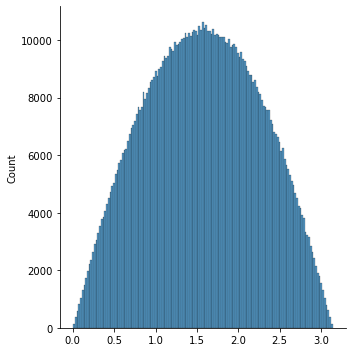

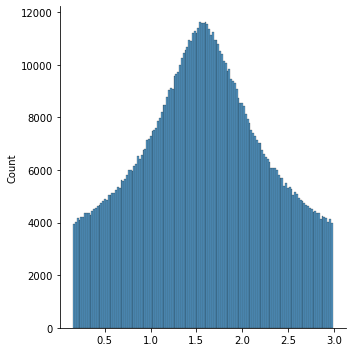

In [5]:
sns.displot(inv_cdf2(num_sorted))
sns.displot(inv_cdf1(num_sorted))

In [6]:
import math

def mom_mu_cm(m_muon, s, t, p):
    #p_norm = math.sqrt(1-(4*m_muon**2)/s)
    p_norm = np.sqrt(s/4-m_muon**2)
    p_x_cm = p_norm * np.cos(t)
    p_y_cm = p_norm * np.sin(t)*np.cos(p)
    p_z_cm = p_norm * np.sin(t)*np.sin(p)
    return p_x_cm, p_y_cm, p_z_cm

def e_pos_lab(s, m_e):
    return s/(2*m_e)-m_e

def p_pos_lab(s, m_e):
    e_pos = e_pos_lab(s, m_e)
    return np.sqrt(e_pos**2-m_e**2)

def beta(s, m_e):
    e_pos = e_pos_lab(s, m_e)
    p_pos = p_pos_lab(s, m_e)
    return p_pos / (e_pos + m_e)
    
def gamma(s, m_e):
    return 1./np.sqrt(1-beta(s, m_e)**2)

def Ecm(s):
    return np.sqrt(s)/2.

def boost(s, t, p, m_e, m_muon):
    e_cm = Ecm(s)
    b = beta(s, m_e)
    g = gamma(s, m_e)
    px_cm, py_cm, pz_cm = mom_mu_cm(m_muon, s, t, p) #py pz sempre uguali -> no boost
    px = g * (b * e_cm + px_cm) #energia e px dipendono dall'angolo
    e = g * (e_cm + b * px_cm)
    return px, py_cm, pz_cm

#quindi avremo un muone con angolo theta* e l'altro con angolo pi-theta*, phi* e phi*+pi

def mc_sampling(s, m_e, m_mu, N):
    prob = np.random.rand(N)
    theta = inv_cdf3(prob)
    phi = np.random.uniform(0, 2*np.pi, N)
    muon_1 = boost(s, theta, phi, m_e, m_muon)
    muon_2 = boost(s, np.pi+theta, phi, m_e, m_muon)
    return np.asarray(muon_1 + muon_2)

In [24]:

events = mc_sampling(220**2, m_e, m_muon, N)
events = events.T
df_monochromatic = pd.DataFrame(events, columns = [
                               '$px_{\mu_1}$',
                               '$py_{\mu_1}$',
                               '$pz_{\mu_1}$',
                               '$px_{\mu_2}$',
                               '$py_{\mu_2}$',
                               '$pz_{\mu_2}$'
                              ]
                )
df_monochromatic.to_csv('Events.csv')

In [25]:
df_monochromatic

,$px_{\mu_1}$,$py_{\mu_1}$,$pz_{\mu_1}$,$px_{\mu_2}$,$py_{\mu_2}$,$pz_{\mu_2}$
0,19384.075991,11.185892,20.325721,27973.631649,-11.185892,-20.325721
1,18130.477825,4.070783,-15.981318,29227.229816,-4.070783,15.981318
2,29105.052618,16.843094,-4.149648,18252.655023,-16.843094,4.149648
3,19098.979896,-21.392290,-5.101811,28258.727744,21.392290,5.101811
4,19322.169802,20.066387,11.137386,28035.537838,-20.066387,-11.137386
...,...,...,...,...,...,...
999995,19950.465307,10.665063,-22.860028,27407.242333,-10.665063,22.860028
999996,24853.833998,0.445090,30.105091,22503.873642,-0.445090,-30.105091
999997,29735.690713,9.278094,-7.651838,17622.016928,-9.278094,7.651838
999998,29502.308137,-14.067857,-2.561903,17855.399504,14.067857,2.561903


/home/giulia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/giulia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/giulia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

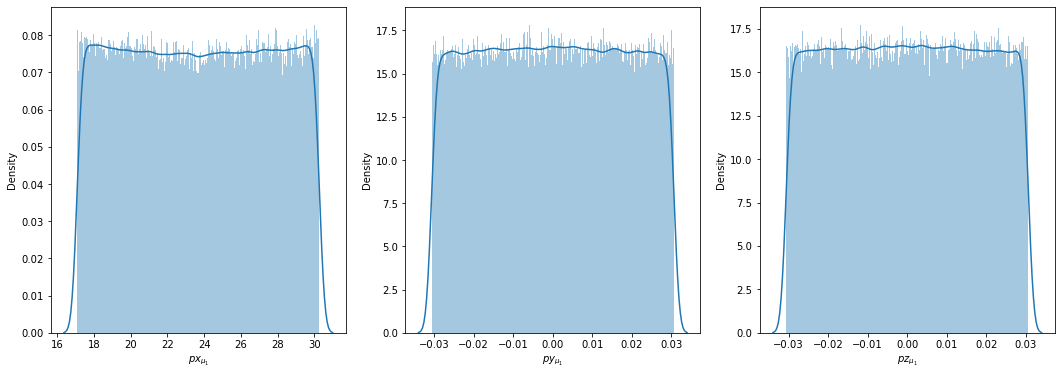

In [26]:
fig, ax = plt.subplots(1,3, figsize = (18,6))
sns.distplot(df_monochromatic['$px_{\mu_1}$']/1000, ax = ax[0], bins = int(np.sqrt(N)))
sns.distplot(df_monochromatic['$py_{\mu_1}$']/1000, ax = ax[1], bins = int(np.sqrt(N)))
sns.distplot(df_monochromatic['$pz_{\mu_1}$']/1000, ax = ax[2], bins = int(np.sqrt(N)))
plt.show()


/home/giulia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='$px_{\\mu_1}$', ylabel='Density'>

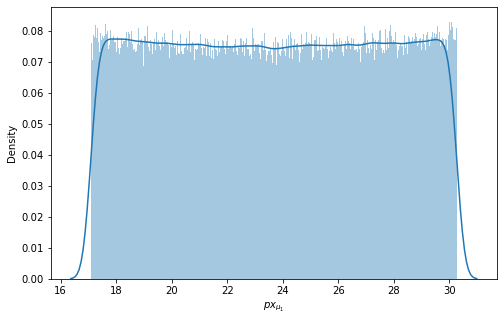

In [27]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
sns.distplot(df_monochromatic['$px_{\mu_1}$']/1000, ax=ax,  bins = int(np.sqrt(N)))

# Montecarlo with real beam

7. repeat what done so far simulating now the actual transverse shape and energy spread of the beam: for the former assume a flat distribution in a circle of radius $r=1$ cm and for the latter a gaussian distribution centered at the nominal beam energy and a width of $0.5$ GeV;

To get a simulation for the real beam we must add the information on how colliding particle energy and position distributes within the chosen set. For the energy we assume a gaussian with mean 48.4 GeV with variance 0.5 GeV, where the beam energy is obtained as $\frac{s}{2 m_e}$. Inverting this formula we get the value for s.

As the icdf method is not runnable, we decide to exploit the accept-reject method in order to get a computationally reasonable task.


In [11]:
#    E_gauss=np.random.rand(10**6)/500 + 48400
#    theta_star=np.linspace(0,np.pi,1000)
#    events=np.zeros((6,1))
#    for i in E_gauss:
#        events=np.hstack((events,mc_sampling(i, m_e, m_muon, 1)))
    #events_2=np.asarray([ mc_sampling(i, m_e, m_muon, 1) for i in E_gauss])
#    events=events[:,1:]
#    events = events.T
#    df = pd.DataFrame(events, columns = [
#                                   '$px_{\mu_1}$',
#                                   '$py_{\mu_1}$',
#                                   '$pz_{\mu_1}$',
#                                   '$px_{\mu_2}$',
#                                   '$py_{\mu_2}$',
#                                   '$pz_{\mu_2}$'
#                                  ]
#                    )


[52608.52265967 52372.09185455 52826.49659446 ... 52130.65430508
 52436.74472364 50458.31245701]


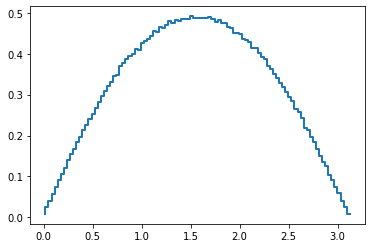

/home/giulia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/giulia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/giulia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

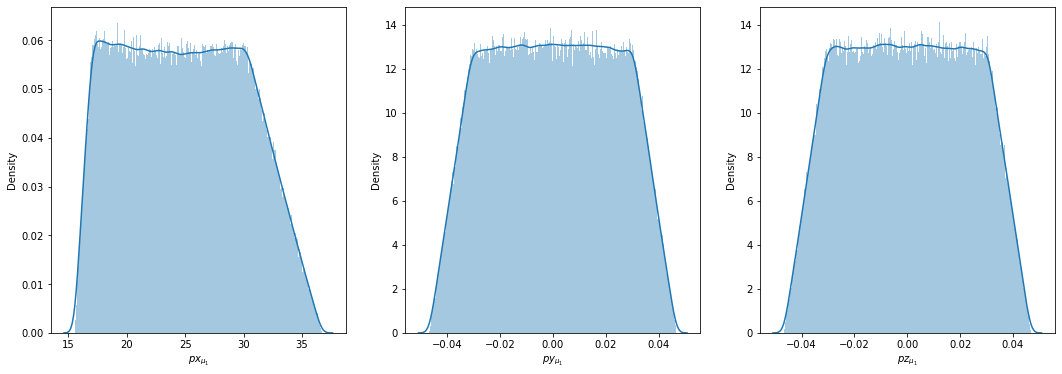

In [12]:
energies_gauss = np.random.rand(2000294)*5000+ 48400
print(energies_gauss)
pts = np.random.uniform( 0, np.pi, len(energies_gauss))
check = np.random.uniform( f(energies_gauss,np.pi/2.), f(energies_gauss,0), len(energies_gauss) )

accepted = pts[check < f(energies_gauss, pts)]

#with pandas
pd_df = pd.DataFrame(pd.Series(energies_gauss), columns = ['energies'])
pd_df["angles"] =  np.random.uniform( 0, np.pi, len(pd_df.energies))
pd_df["check"]  = np.random.uniform( 0, f(pd_df.energies,np.pi/2), len(pd_df.energies) )
pd_df["label"]  = pd_df.angles[pd_df.check < f(pd_df.energies, pd_df.angles)*np.sin(pd_df.angles)]
pd_df = pd_df.dropna()
pd_df



# def boost(s, t, p, m_e, m_muon):
#     e_cm = Ecm(s)
#     b = beta(s, m_e)
#     g = gamma(s, m_e)
#     px_cm, py_cm, pz_cm = mom_mu_cm(m_muon, s, t, p) #py pz sempre uguali -> no boost
#     px = g * (b * e_cm + px_cm) #energia e px dipendono dall'angolo
#     e = g * (e_cm + b * px_cm)
#     return px, py_cm, pz_cm

# #quindi avremo un muone con angolo theta* e l'altro con angolo pi-theta*, phi* e phi*+pi

def mc_real_sampling(s, theta, m_e, m_mu, N):
    phi = np.random.uniform(0, 2*np.pi, N)
    muon_1 = boost(s, theta, phi, m_e, m_muon)
    muon_2 = boost(s, np.pi+theta, phi, m_e, m_muon)
    return np.asarray(muon_1 + muon_2)

def mc_df_sampling(df, m_e, m_muon):
    phi = np.random.uniform(0, 2*np.pi, df.shape[0])
    muon_1 = boost(np.asarray(df.energies), np.asarray(df.angles), phi, m_e, m_muon)
    muon_2 = boost(np.asarray(df.energies), np.asarray(df.angles+np.pi), phi, m_e, m_muon)
    return np.asarray(muon_1 + muon_2)

hist, bin_edges = np.histogram(pd_df.angles, bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
plt.step(bin_centers, hist, linewidth=2)
plt.show()


events = mc_df_sampling(pd_df, m_e, m_muon)

events = events.T
df = pd.DataFrame(events, columns = [
                              '$px_{\mu_1}$',
                              '$py_{\mu_1}$',
                              '$pz_{\mu_1}$',
                              '$px_{\mu_2}$',
                              '$py_{\mu_2}$',
                              '$pz_{\mu_2}$'
                             ]
               )
df

fig, ax = plt.subplots(1,3, figsize = (18,6))
sns.distplot(df['$px_{\mu_1}$']/1000, ax = ax[0], bins = int(np.sqrt(N)))
sns.distplot(df['$py_{\mu_1}$']/1000, ax = ax[1], bins = int(np.sqrt(N)))
sns.distplot(df['$pz_{\mu_1}$']/1000, ax = ax[2], bins = int(np.sqrt(N)))
plt.show()

In [13]:
df

,$px_{\mu_1}$,$py_{\mu_1}$,$pz_{\mu_1}$,$px_{\mu_2}$,$py_{\mu_2}$,$pz_{\mu_2}$
0,22137.885033,-9.319154,36.042762,27574.045626,9.319154,-36.042762
1,32990.943380,16.463446,20.938228,17932.042923,-16.463446,-20.938228
2,32422.907268,11.293056,19.566273,17635.756988,-11.293056,-19.566273
3,32314.949724,-35.738228,-2.864611,19550.542436,35.738228,2.864611
4,17146.415557,-4.625353,14.779005,31947.580942,4.625353,-14.779005
...,...,...,...,...,...,...
1301919,21262.088588,-23.631895,-21.978373,27245.418852,23.631895,21.978373
1301920,23218.309735,-36.686862,19.388485,27590.048296,36.686862,-19.388485
1301921,25768.000978,-13.765107,-40.964582,25240.060842,13.765107,40.964582
1301922,21743.315107,6.336789,-40.009310,29564.248716,-6.336789,40.009310


/home/giulia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/giulia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/giulia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

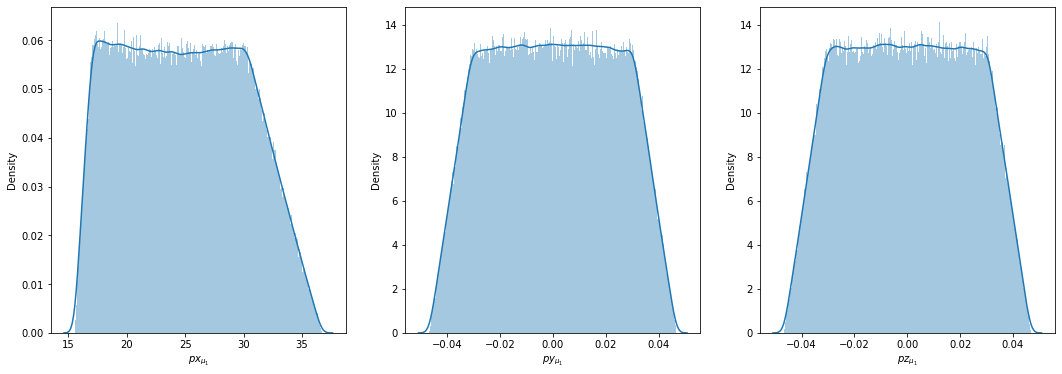

In [14]:
fig, ax = plt.subplots(1,3, figsize = (18,6))
sns.distplot(df['$px_{\mu_1}$']/1000, ax = ax[0], bins = int(np.sqrt(N)))
sns.distplot(df['$py_{\mu_1}$']/1000, ax = ax[1], bins = int(np.sqrt(N)))
sns.distplot(df['$pz_{\mu_1}$']/1000, ax = ax[2], bins = int(np.sqrt(N)))
plt.show()


## Berillium target

In order to compute the scaling factor that retrieves the statistics for a one week data gathering we compute the number of pairs produced for positron bunch on target $n(\mu^+ \mu^-)$ that is given by:
$$n(\mu^+ \mu^-)=n^+ \rho^- l \sigma(\mu^+ \mu^-)$$
where $n^+$ is the number of positrons in the bunch, $\rho^-$ is the electron density in the medium, l is the target thickness and  $\sigma(\mu^+ \mu^-)$ is the muon pairs production cross-section.
Then, expressing it as a function of the impinging positrons rate $f^+$ it holds:
$$f(\mu^+ \mu^-)=f^+ \rho^- l \sigma(\mu^+ \mu^-)$$

It is possible to express $\rho^-$ as:
$$\rho^-=N_A \frac{\rho_{Be}Z}{M_t}$$
in which $N_A$ is the Avogadro number, $\rho_{Be}$ is the Beryllium density, Z is its atomic number and $M_t$ its molar mass.

Then the rescaling factor is given by W=$f(\mu^+ \mu^-) \Delta T$, where $\Delta T$ is the number of seconds in a week



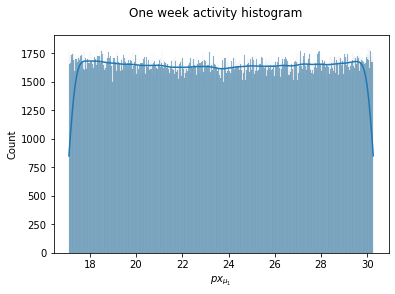

In [57]:
freq = 10**6
rhoBe = 1.848 # g/cm^3
N_a = 6.022*10**23
Z = 4
M = 9.012 #u
l = 6 #cm
rho_elec = N_a * (rhoBe*Z) / (M)
fmu = freq * rho_elec * l * sigma(230**2) * 1e-24 *389
deltaT = 60 * 60 * 24 * 7
fweek = fmu * deltaT 


weights = np.full(int((N)), fweek/N)
df_monochromatic['weights']=weights

sns.histplot(x=df_monochromatic['$px_{\mu_1}$']/1000, 
             weights= df_monochromatic['weights'], 
             bins = int(np.sqrt(N)), 
             kde=True
             
            )
plt.suptitle('One week activity histogram')
plt.show()


In order to have threshold production of a muon pair, $\sqrt {s}$ should be slightly grater than the sum of the mass of two muons
$$\sqrt {s} > 2m_\mu \implies s > 4m_\mu^2 $$ 
So, rewriting the invariant quantity $s$ in the laboratory frame while taking into account that the electron is at rest we obtain
$$ s = E_{e_+}^2 + E_{e_-}^2+2E_{e_+}E_{e_-}-p_{e_+}^2 = E_{e_+}^2 + m_{e_-}^2+2E_{e_+}m_{e_-}-p_{e_+}^2$$
Joining the two conditions:
$$2E_{e_+}m_{e_-}>4m_{\mu}^2-2m_{e_-}^2$$
And finally the condition on the energy of the positron:
$$E_{e_+}>\frac{4m_{\mu}^2-2m_{e_-}^2}{2m_{e_{-}}}$$
But:
$$E_{e_{+}}=E_0e^{-\frac{Z}{\chi_0}}$$
where $\chi_0$ is the radiation length of the Berylium: $\chi_0=35.28$ cm (from PDG). In order to have the condition satisfied along the whole length of the target we impose it at the end of the target ($Z_{max} =3$ cm). In the end, to find the $E_0$ that satisfies the condition we explicit for $E_0$ obtaining:
$$E_0>\left(\frac{4m_{\mu}^2-2m_{e_-}^2}{2m_{e_{-}}}\right)e^{\frac{Z_{max}}{\chi_0}}$$ 

In [59]:
rad_length = 35.28 #cm (radiation length of Berylium taken from PDG)
z_max = 3 #cm

result= ((4*m_muon**2-2*m_e**2)/(2*m_e))*math.exp(z_max/rad_length)
print (result, 'MeV')

47571.03165490111 MeV


In [71]:
def s_berms(z):
    return 2 * m_e**2 + 2* result * np.exp(-z/rad_length) * m_e

print( (s_berms(3) - s_berms(0))/s_berms(3)*100)
print(np.sqrt(s_berms(3)))
def mc_sampling(m_e, m_mu, N):
    prob = np.random.rand(N)
    theta = inv_cdf3(prob)
    phi = np.random.uniform(0, 2*np.pi, N)
    z_coord = np.random.uniform(0,3,N)
    s_berms_vec = s_berms(z_coord)
    muon_1 = boost(s_berms_vec, theta, phi, m_e, m_muon)
    muon_2 = boost(s_berms_vec, np.pi+theta, phi, m_e, m_muon)
    return np.asarray(muon_1 + muon_2)


events = mc_sampling( m_e, m_muon, N)
events = events.T
df_radiation = pd.DataFrame(events, columns = [
                               '$px_{\mu_1}$',
                               '$py_{\mu_1}$',
                               '$pz_{\mu_1}$',
                               '$px_{\mu_2}$',
                               '$py_{\mu_2}$',
                               '$pz_{\mu_2}$'
                              ]
                )
df_radiation

-8.87530605371248
211.31675100000004


,$px_{\mu_1}$,$py_{\mu_1}$,$pz_{\mu_1}$,$px_{\mu_2}$,$py_{\mu_2}$,$pz_{\mu_2}$
0,20253.541275,16.891412,11.272150,25698.818028,-16.891412,-11.272150
1,22762.211964,-0.618814,-24.098438,23209.671842,0.618814,24.098438
2,28298.631431,19.281847,-12.831340,19225.990371,-19.281847,12.831340
3,25995.719587,9.613904,-4.297550,19164.672996,-9.613904,4.297550
4,20755.288542,1.673082,11.489783,23654.751642,-1.673082,-11.489783
...,...,...,...,...,...,...
999995,21209.165018,-4.425512,2.232337,22625.870393,4.425512,-2.232337
999996,22222.799938,-4.348394,0.712065,21556.424431,4.348394,-0.712065
999997,23552.241549,-9.743815,20.413653,22184.344119,9.743815,-20.413653
999998,24739.605338,5.253011,22.058312,21233.290922,-5.253011,-22.058312


/home/giulia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/giulia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/giulia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

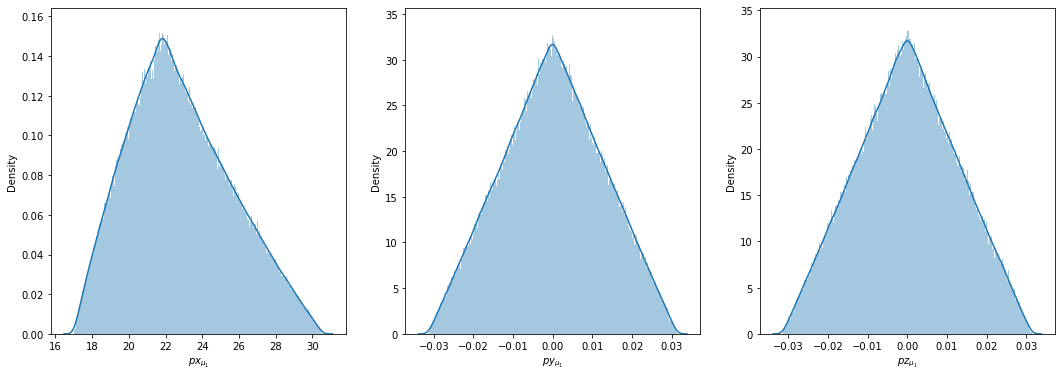

In [67]:
fig, ax = plt.subplots(1,3, figsize = (18,6))
sns.distplot(df_radiation['$px_{\mu_1}$']/1000, ax = ax[0], bins = int(np.sqrt(N)))
sns.distplot(df_radiation['$py_{\mu_1}$']/1000, ax = ax[1], bins = int(np.sqrt(N)))
sns.distplot(df_radiation['$pz_{\mu_1}$']/1000, ax = ax[2], bins = int(np.sqrt(N)))
plt.show()


#### Part 2: use the synthetic dataset to design an experiment

Assume a $2$ meter long, $1.7$ Tesla dipole magnet is placed after the target. Assume a number of tracking detectors can be placed before the target, after the target before the magnet (one line) and after the magnet (two lines, one for positive the other for negative muons); those could be made of silicon pixels, with a single-hit resolution varying from 50 to 200 ${\rm \mu m}$.  
Try to address the following items keeping in mind that money matters (i.e. you cannot buy an infinite number of detectors and the smaller the single-hit resolution the higher the cost) and that the layout of the experiment has to be as compact as possible (say whithin 20 m).

1. Define the sizes of the various detectors, such that all the particles traverse them (i.e. $100\%$ detector acceptance); 
2. have each event of the synthetich dataset "interacting" with the detectors, i.e. generate a dataset with the hits (properly smeared due to detector resolutions) left by particles crosssing each detector. That should correspond to the actual measurments gathered by the experiment;
3. add some random noise to such measurements (e.g. for each detector accordingly to poisson statistic of mean about 1);
4. develop an algorithm to track the particles, both the incoming positrons and the outgoing muons.
5. keep in consideration the fact that the two muons emerge synchronously from the target: how small the pitch (the distance between individual pixels) have to be of the detectors prior to the magnet? If that is too small, adjust the tracking algorithm accordingly (i.e. the reconstruct muon tracks could share hits in those detectors) 
6. compute the resolution of the muon momenta and of the $\sqrt(s)$;
7. (optional, a though one..) correct the muon trajectories for the transverse position of the hard scattering on the target section. Actually the incoming positrons are both dispersed in space (the flat distribution with  $r=1$ cm) and divergent; one would need to correct for that too.

### References

* [LEMMA](https://arxiv.org/pdf/1509.04454.pdf) paper. The original paper describing the positron-induced low emittance muon source, ehere all the relevant kinematic features of the process have been studied
* [Babayaga](https://www2.pv.infn.it/~hepcomplex/babayaga.html) event generator. You may want to install and run it as a comparison for your results.
* [2018 Experiment](https://arxiv.org/pdf/1909.13716.pdf): the paper describing the (very poor..) results of the experiment carried out in summer 2018
* [2021 proposal](https://cds.cern.ch/record/2712394?ln=en): the proposal for the experiment in 2021


### Contact

* Marco Zanetti <marco.zanetti@unipd.it>
* Camilla Curatolo <camilla.curatolo@pd.infn.it>
* Jacopo Pazzini <jacopo.pazzini@unipd.it>
* Alberto Zucchetta <alberto.zucchetta@pd.infn.it>